Preliminary exploration of Wisconsin breast cancer dataset. In this script, the features will be standardized and K-nearest neighbor (KNN) clustering will be applied. 

In [24]:
# Import packages and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [13]:
# Import dataset
cancer = pd.read_csv('../data/raw/breast.csv')
print(cancer.columns)

# Create subset with feature means which correspond to the first 10 variables
cancer_sub = cancer[['Diagnosis','radius1', 'texture1', 'perimeter1', 'area1',
       'smoothness1', 'compactness1', 'concavity1', 'concave_points1',
       'symmetry1', 'fractal_dimension1']]

In [16]:
# Standardize features using the z-score method
scaler = StandardScaler()

features = ['radius1', 'texture1', 'perimeter1', 'area1',
       'smoothness1', 'compactness1', 'concavity1', 'concave_points1',
       'symmetry1', 'fractal_dimension1']

standardized_cancer_sub = scaler.fit_transform(cancer_sub[features])

# Convert the standardized data back to a DataFrame
standardized_cancer_sub = pd.DataFrame(standardized_cancer_sub, columns=features)

standardized_cancer_sub.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.373633e-16,6.868164e-17,-1.248757e-16,-2.185325e-16,-8.366672e-16,1.873136e-16,4.995028e-17,-4.995028e-17,1.748260e-16,4.745277e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00


In [17]:
# Split the dataset into test and training sets at 25-75 split.

X_train, X_test, y_train, y_test = train_test_split(standardized_cancer_sub, 
                                                    cancer_sub['Diagnosis'], 
                                                    test_size=0.25, random_state=42)

# Verify shapes
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(426, 10) (143, 10)
(426,) (143,)


In [18]:
# Set up a grid search to identify the optimum number of k between 1 to 30 in knn classification
knn = KNeighborsClassifier()

parameter_grid = {
    "n_neighbors": range(1, 31),
}

cancer_tune_grid = GridSearchCV(
    estimator=knn,
    param_grid=parameter_grid,
    cv=10
)

In [23]:
# Run the grid search and identify the k with optimum accuracy
cancer_tune_grid.fit(
    X_train,
    y_train
)

accuracies_grid = pd.DataFrame(cancer_tune_grid.cv_results_)
accuracies_grid.describe()

cancer_tune_grid.best_params_

{'n_neighbors': 17}

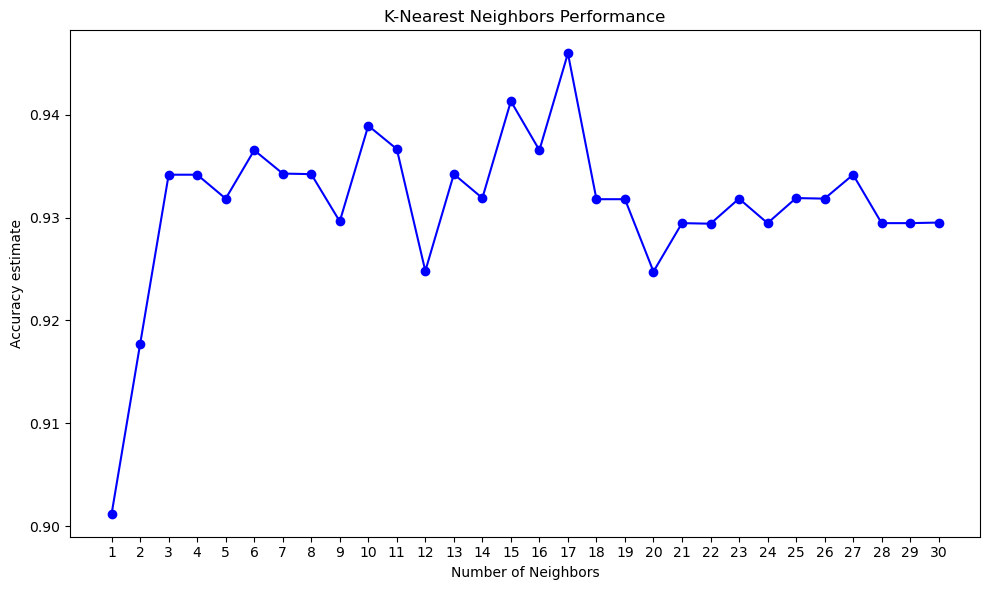

In [22]:
# Visualize results of the grid search

# Create the plot
plt.figure(figsize=(10, 6))

# Plot mean test scores with error bars
plt.plot(accuracies_grid['param_n_neighbors'], accuracies_grid['mean_test_score'], '-o', color='blue')

# Add labels and legend
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy estimate')
plt.title('K-Nearest Neighbors Performance')

# Add tick marks at every integer for the x-axis
plt.xticks(np.arange(min(accuracies_grid['param_n_neighbors']), max(accuracies_grid['param_n_neighbors']) + 1, 1))

plt.tight_layout()
plt.show()

As shows both programatically and visually, the optimum number of neighbors is 17. 

Next, a new KNN model is constructed with the optimum number of neighbors using the training data. Then, this new model will be tested on the test dataset to evaluate accuracy. 

In [25]:
# Refit the KNN model with the best k value
knn_best = KNeighborsClassifier(n_neighbors=17)
knn_best.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_best.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")

# Detailed classification report (precision, recall, F1-score)
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")


Test Accuracy: 0.965034965034965
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        89
           M       0.98      0.93      0.95        54

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

Confusion Matrix:
[[88  1]
 [ 4 50]]
